In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## **Defining classes and functions:**

In [ ]:
class CurrencyData:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)
        self.data['date'] = pd.to_datetime(self.data['date'])
        self.data.set_index('date', inplace=True)

    def show_head(self):
        return self.data.head()

    def check_missing_values(self):
        return self.data.isnull().sum()

    def fill_missing_values(self, method='ffill'):
        self.data.fillna(method=method, inplace=True)
        return self.data


## **Class EDA for exploratory data analysis**

In [ ]:
class EDA:
    def __init__(self, data):
        self.data = data

    def descriptive_statistics(self):
        return self.data.describe()

    def plot_time_series(self, currencies):
        plt.figure(figsize=(14, 7))
        for currency in currencies:
            plt.plot(self.data.index, self.data[currency], label=f'{currency}')
        plt.xlabel('Date')
        plt.ylabel('Exchange Rate')
        plt.title('Exchange Rates Over Time')
        plt.legend()
        plt.show()


## **Class DataCleaning for data cleaning**

In [ ]:
class DataCleaning:
    def __init__(self, data):
        self.data = data

    def fill_missing_values(self, method='ffill'):
        self.data.fillna(method=method, inplace=True)
        return self.data


## **Class FeatureEngineering for feature creation**

In [ ]:
class FeatureEngineering:
    def __init__(self, data):
        self.data = data

    def add_moving_average(self, column, window=30):
        self.data[f'{column}_ma'] = self.data[column].rolling(window=window).mean()
        return self.data


## **Class TimeSeriesModeling for time series modeling**

In [ ]:
class TimeSeriesModeling:
    def __init__(self, data):
        self.data = data

    def train_arima(self, column, order=(5,1,0)):
        model = ARIMA(self.data[column].dropna(), order=order)
        self.arima_result = model.fit()
        return self.arima_result.summary()


In [ ]:
file_path = 'exchange_rate_to_usd.csv'
currency_data = CurrencyData(file_path)
print(currency_data.show_head())
print(currency_data.check_missing_values())


            chinese_yuan_to_usd  euro_to_usd  japanese_yen_to_usd  \
date                                                                
2004-01-02                  NaN       1.2592                  NaN   
2004-01-05             0.120817       1.2657             0.009355   
2004-01-06             0.120815       1.2756             0.009412   
2004-01-07             0.120814       1.2679             0.009413   
2004-01-08             0.120814       1.2634             0.009421   

            uk_pound_to_usd  us_dollar_to_usd  algerian_dinar_to_usd  \
date                                                                   
2004-01-02           1.7858               1.0                    NaN   
2004-01-05           1.7996               1.0                    NaN   
2004-01-06           1.8209               1.0                    NaN   
2004-01-07           1.8140               1.0                    NaN   
2004-01-08           1.8122               1.0                    NaN   

           

In [ ]:
data_cleaning = DataCleaning(currency_data.data)
cleaned_data = data_cleaning.fill_missing_values()
print(cleaned_data.isnull().sum())


chinese_yuan_to_usd              1
euro_to_usd                      0
japanese_yen_to_usd              1
uk_pound_to_usd                  0
us_dollar_to_usd                 0
algerian_dinar_to_usd         1651
australian_dollar_to_usd         0
bahrain_dinar_to_usd             0
botswana_pula_to_usd             1
brazilian_real_to_usd            0
brunei_dollar_to_usd             0
canadian_dollar_to_usd           0
chilean_peso_to_usd              1
colombian_peso_to_usd            0
czech_koruna_to_usd              0
danish_krone_to_usd              0
hungarian_forint_to_usd          1
icelandic_krona_to_usd           1
indian_rupee_to_usd              0
indonesian_rupiah_to_usd         1
iranian_rial_to_usd              0
israeli_new_shekel_to_usd        2
kazakhstani_tenge_to_usd       495
korean_won_to_usd                0
kuwaiti_dinar_to_usd             2
libyan_dinar_to_usd              1
malaysian_ringgit_to_usd         1
mauritian_rupee_to_usd           1
mexican_peso_to_usd 

       chinese_yuan_to_usd  euro_to_usd  japanese_yen_to_usd  uk_pound_to_usd  \
count          5173.000000  5174.000000          5173.000000      5174.000000   
mean              0.145669     1.234654             0.009424         1.536154   
std               0.012539     0.128899             0.001476         0.241546   
min               0.120811     0.956500             0.006187         1.065400   
25%               0.139132     1.121800             0.008622         1.309200   
50%               0.146479     1.221900             0.009174         1.537300   
75%               0.156240     1.329500             0.009930         1.686800   
max               0.164123     1.599000             0.013182         2.102000   

       us_dollar_to_usd  algerian_dinar_to_usd  australian_dollar_to_usd  \
count            5174.0            3523.000000               5174.000000   
mean                1.0               0.009816                  0.801606   
std                 0.0               0.00

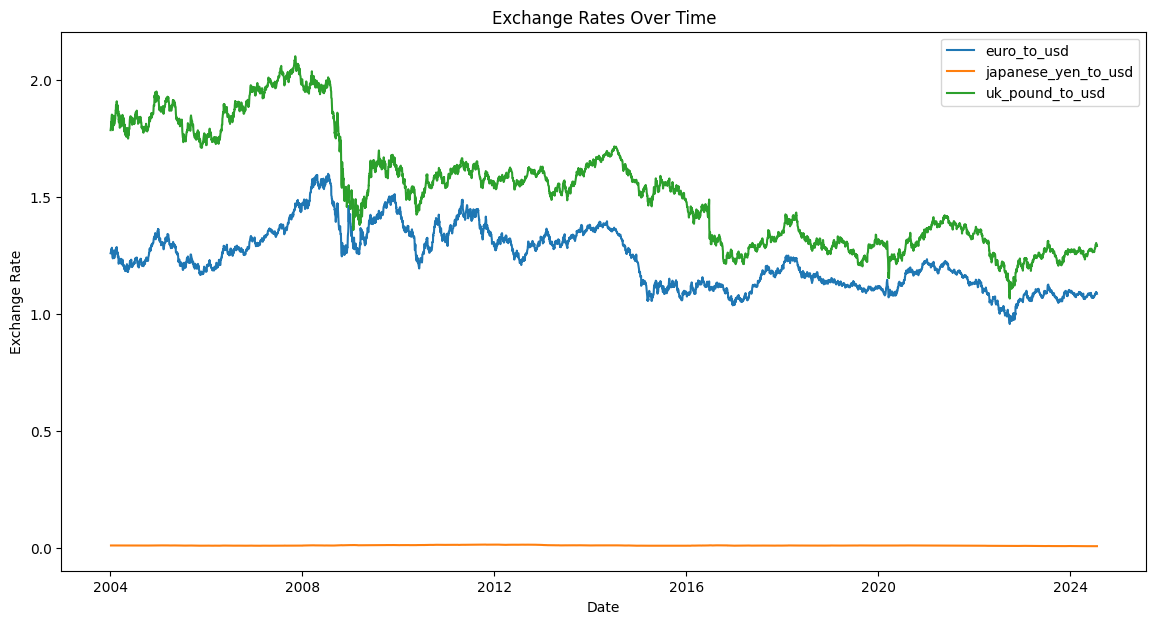

In [ ]:
eda = EDA(cleaned_data)
print(eda.descriptive_statistics())
eda.plot_time_series(['euro_to_usd', 'japanese_yen_to_usd', 'uk_pound_to_usd'])


In [ ]:
feature_engineering = FeatureEngineering(cleaned_data)
feature_data = feature_engineering.add_moving_average('euro_to_usd')

print(feature_data.head())


            chinese_yuan_to_usd  euro_to_usd  japanese_yen_to_usd  \
date                                                                
2004-01-02                  NaN       1.2592                  NaN   
2004-01-05             0.120817       1.2657             0.009355   
2004-01-06             0.120815       1.2756             0.009412   
2004-01-07             0.120814       1.2679             0.009413   
2004-01-08             0.120814       1.2634             0.009421   

            uk_pound_to_usd  us_dollar_to_usd  algerian_dinar_to_usd  \
date                                                                   
2004-01-02           1.7858               1.0                    NaN   
2004-01-05           1.7996               1.0                    NaN   
2004-01-06           1.8209               1.0                    NaN   
2004-01-07           1.8140               1.0                    NaN   
2004-01-08           1.8122               1.0                    NaN   

           

In [ ]:
ts_modeling = TimeSeriesModeling(feature_data)

# Training the ARIMA model
print(ts_modeling.train_arima('euro_to_usd'))


                               SARIMAX Results                                
Dep. Variable:            euro_to_usd   No. Observations:                 5174
Model:                 ARIMA(5, 1, 0)   Log Likelihood               18192.296
Date:                Thu, 25 Jul 2024   AIC                         -36372.591
Time:                        17:02:39   BIC                         -36333.284
Sample:                             0   HQIC                        -36358.838
                               - 5174                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007      0.009      0.076      0.940      -0.017       0.018
ar.L2         -0.0066      0.011     -0.602      0.547      -0.028       0.015
ar.L3          0.0028      0.012      0.243      0.8

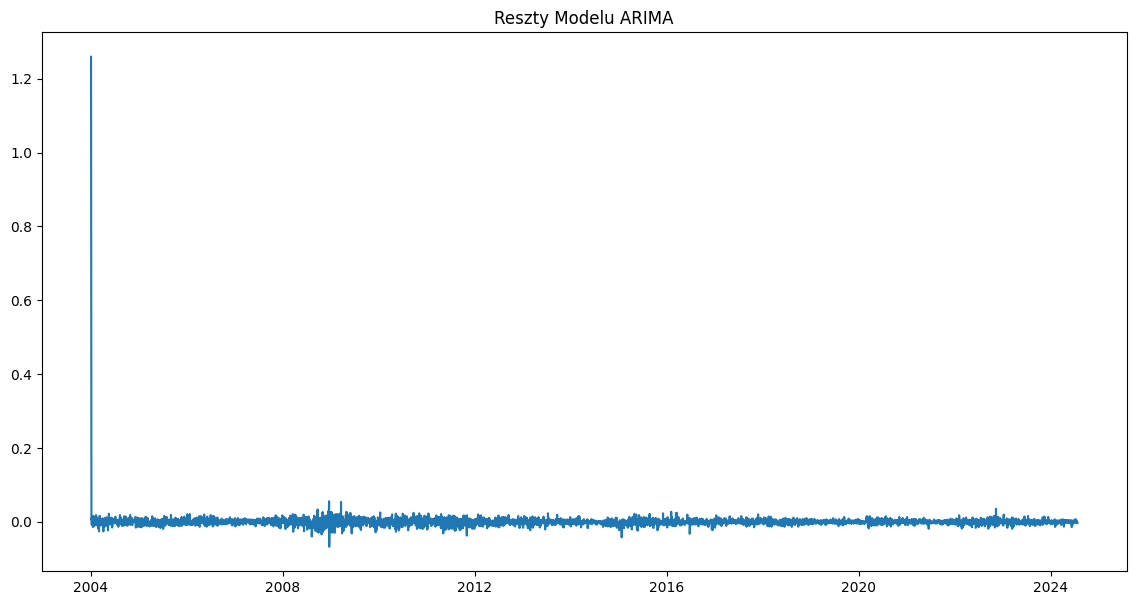

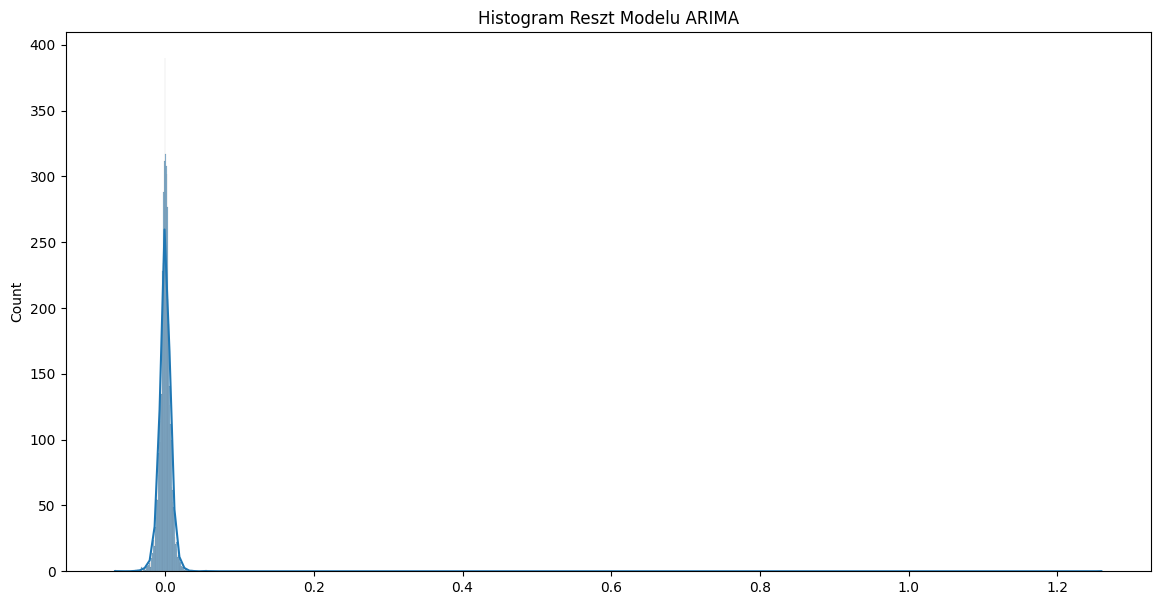

<Figure size 1400x700 with 0 Axes>

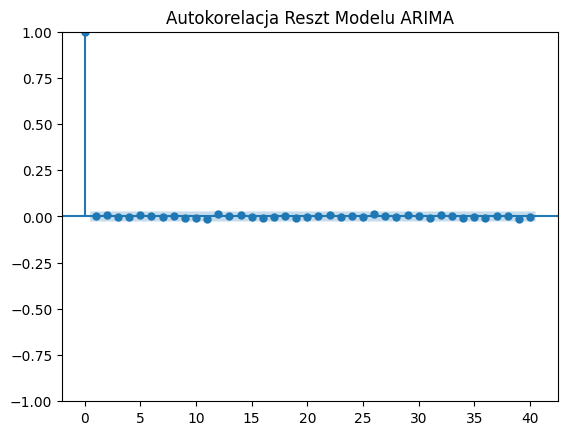

In [ ]:
# Residual plot
plt.figure(figsize=(14, 7))
plt.plot(ts_modeling.arima_result.resid)
plt.title('Reszty Modelu ARIMA')
plt.show()

# Histogram of residuals
plt.figure(figsize=(14, 7))
sns.histplot(ts_modeling.arima_result.resid, kde=True)
plt.title('Histogram Reszt Modelu ARIMA')
plt.show()

# Autocorrelation of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 7))
plot_acf(ts_modeling.arima_result.resid, lags=40)
plt.title('Autokorelacja Reszt Modelu ARIMA')
plt.show()
